In [705]:
import pandas as pd
import sklearn
import numpy as np
from sklearn import preprocessing
import sklearn.metrics as metrics
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

In [706]:
features_orig = pd.read_pickle("../data/processed/features.pkl")
features_orig.head(2)

,installation_id,12 Monkeys,Air Show,All Star Sorting,Balancing Act,Bird Measurer (Assessment),Bottle Filler (Activity),Bubble Bath,Bug Measurer (Activity),Cart Balancer (Assessment),...,Tree Top City - Level 2,Tree Top City - Level 3,Watering Hole (Activity),Welcome to Lost Lagoon!,game_session,title,num_correct,num_incorrect,accuracy,accuracy_group
0,0006a69f,True,True,True,False,True,True,True,True,False,...,True,True,True,True,6bdf9623adc94d89,Mushroom Sorter (Assessment),1,0,1.0,3
1,0006a69f,True,True,True,False,True,True,True,True,False,...,True,True,True,True,77b8ee947eb84b4e,Bird Measurer (Assessment),0,11,0.0,0


In [707]:
# data = pd.read_pickle("../data/processed/memory_optimized_data.pkl")

In [708]:
categories_of_titles=data[['title','type','world']]
categories_of_titles=categories_of_titles.drop_duplicates('title')
categories_of_titles=categories_of_titles.set_index('title')
categories_of_titles

,type,world
title,,
Welcome to Lost Lagoon!,Clip,NONE
Magma Peak - Level 1,Clip,MAGMAPEAK
Sandcastle Builder (Activity),Activity,MAGMAPEAK
Scrub-A-Dub,Game,MAGMAPEAK
Magma Peak - Level 2,Clip,MAGMAPEAK
Dino Drink,Game,MAGMAPEAK
Tree Top City - Level 1,Clip,TREETOPCITY
Ordering Spheres,Clip,TREETOPCITY
Watering Hole (Activity),Activity,MAGMAPEAK


In [711]:
#Filter only for a given world
# features=features_orig[['accuracy_group','title']+categories_of_titles[categories_of_titles['world']=='CRYSTALCAVES'].index.to_list()]
# features=features[features['title']=='Cart Balancer (Assessment)']


features=features_orig
features

,installation_id,12 Monkeys,Air Show,All Star Sorting,Balancing Act,Bird Measurer (Assessment),Bottle Filler (Activity),Bubble Bath,Bug Measurer (Activity),Cart Balancer (Assessment),...,Tree Top City - Level 2,Tree Top City - Level 3,Watering Hole (Activity),Welcome to Lost Lagoon!,game_session,title,num_correct,num_incorrect,accuracy,accuracy_group
0,0006a69f,True,True,True,False,True,True,True,True,False,...,True,True,True,True,6bdf9623adc94d89,Mushroom Sorter (Assessment),1,0,1.000000,3
1,0006a69f,True,True,True,False,True,True,True,True,False,...,True,True,True,True,77b8ee947eb84b4e,Bird Measurer (Assessment),0,11,0.000000,0
2,0006a69f,True,True,True,False,True,True,True,True,False,...,True,True,True,True,901acc108f55a5a1,Mushroom Sorter (Assessment),1,0,1.000000,3
3,0006a69f,True,True,True,False,True,True,True,True,False,...,True,True,True,True,9501794defd84e4d,Mushroom Sorter (Assessment),1,1,0.500000,2
4,0006a69f,True,True,True,False,True,True,True,True,False,...,True,True,True,True,a9ef3ecb3d1acc6a,Bird Measurer (Assessment),1,0,1.000000,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
17685,ffc90c32,True,True,True,True,True,True,True,False,True,...,True,True,True,True,c996482b11d149dd,Bird Measurer (Assessment),1,0,1.000000,3
17686,ffd2871d,False,False,False,True,False,True,True,False,False,...,False,False,False,True,b05a02b52d5c1f4c,Cauldron Filler (Assessment),1,0,1.000000,3
17687,ffeb0b1b,False,False,False,False,False,False,False,False,False,...,False,False,False,True,5448d652309a6324,Cauldron Filler (Assessment),1,2,0.333333,1
17688,ffeb0b1b,False,False,False,False,False,False,False,False,False,...,False,False,False,True,a6885ab824fbc32c,Mushroom Sorter (Assessment),0,1,0.000000,0


In [712]:
# Labels are the values we want to predict
labels = np.array(features['accuracy_group'])
# Remove the labels from the features
# axis 1 refers to the columns
features= features.drop(['accuracy_group','accuracy','num_correct','num_incorrect','installation_id','game_session'], axis = 1)


# #Filter only for a given world
# features= features.drop(['accuracy_group','title'], axis = 1)


# # Saving feature names for later use
# feature_list = list(features.columns)

In [713]:
features=pd.get_dummies(features, prefix=['title'], columns=['title'])

In [714]:
features.head(2)

,12 Monkeys,Air Show,All Star Sorting,Balancing Act,Bird Measurer (Assessment),Bottle Filler (Activity),Bubble Bath,Bug Measurer (Activity),Cart Balancer (Assessment),Cauldron Filler (Assessment),...,Tree Top City - Level 1,Tree Top City - Level 2,Tree Top City - Level 3,Watering Hole (Activity),Welcome to Lost Lagoon!,title_Bird Measurer (Assessment),title_Cart Balancer (Assessment),title_Cauldron Filler (Assessment),title_Chest Sorter (Assessment),title_Mushroom Sorter (Assessment)
0,True,True,True,False,True,True,True,True,False,False,...,True,True,True,True,True,0,0,0,0,1
1,True,True,True,False,True,True,True,True,False,False,...,True,True,True,True,True,1,0,0,0,0


In [715]:
# Convert to numpy array
features_copy=features.copy()
features = np.array(features)

In [716]:
# Using Skicit-learn to split data into training and testing sets
from sklearn.model_selection import train_test_split
# Split the data into training and testing sets
train_features, test_features, train_labels, test_labels = train_test_split(features, labels, test_size = 0.25, random_state = 42)

In [717]:
print('Training Features Shape:', train_features.shape)
print('Training Labels Shape:', train_labels.shape)
print('Testing Features Shape:', test_features.shape)
print('Testing Labels Shape:', test_labels.shape)


Training Features Shape: (13267, 49)
Training Labels Shape: (13267,)
Testing Features Shape: (4423, 49)
Testing Labels Shape: (4423,)


In [718]:
# Import the model we are using
from sklearn.ensemble import RandomForestRegressor
# Instantiate model with 1000 decision trees
rf = RandomForestRegressor(n_estimators = 1000, random_state = 42)
# Train the model on training data
rf.fit(train_features, train_labels);

In [719]:
# Use the forest's predict method on the test data
predictions = rf.predict(test_features)

In [720]:
def prepare_for_comparison(predictions,labels):
    predictions_formatted=predictions.round()
    labels_formatted=labels.round()
    labels_formatted_pd=pd.DataFrame(data=labels_formatted,columns=[['labels']])
    print(labels_formatted_pd.tail())
    predictions_formatted_pd=pd.DataFrame(predictions_formatted,columns=[['predictions']])
    combined_df=pd.concat([predictions_formatted_pd,labels_formatted_pd],axis=1)
    combined_df.columns=['predictions', 'labels']
    combined_df['predictions']=combined_df['predictions'].map(lambda x : int(x))
    
    return combined_df

In [721]:
combined = prepare_for_comparison(predictions,test_labels)

     labels
4418      3
4419      3
4420      3
4421      3
4422      3


In [722]:
predictions_train = rf.predict(train_features)

In [723]:
combined_train = prepare_for_comparison(predictions_train,train_labels)

      labels
13262      2
13263      3
13264      3
13265      3
13266      3


In [724]:
comparison=combined['predictions']==combined['labels']
round(comparison.sum()/len(comparison),2)

0.37

In [725]:
comparison=combined_train['predictions']==combined_train['labels']
round(comparison.sum()/len(comparison),2)

0.59

In [726]:
print(sklearn.metrics.classification_report(combined['labels'], combined['predictions']))

              precision    recall  f1-score   support

           0       0.79      0.24      0.36      1050
           1       0.23      0.43      0.30       611
           2       0.16      0.53      0.25       564
           3       0.76      0.38      0.51      2198

    accuracy                           0.37      4423
   macro avg       0.48      0.39      0.35      4423
weighted avg       0.62      0.37      0.41      4423



In [727]:
print(sklearn.metrics.classification_report(combined_train['labels'], combined_train['predictions']))

              precision    recall  f1-score   support

           0       0.98      0.50      0.66      3179
           1       0.38      0.61      0.47      1800
           2       0.26      0.72      0.38      1641
           3       0.94      0.60      0.73      6647

    accuracy                           0.59     13267
   macro avg       0.64      0.61      0.56     13267
weighted avg       0.79      0.59      0.64     13267



In [693]:
print(round(len(combined_train[combined_train['labels']==0])/len(combined_train),2))
print(round(len(combined_train[combined_train['labels']==1])/len(combined_train),2))
print(round(len(combined_train[combined_train['labels']==2])/len(combined_train),2))
print(round(len(combined_train[combined_train['labels']==3])/len(combined_train),2))

0.13
0.08
0.11
0.67


## Visualisation and Interpretation

In [694]:
# estimator = rf.estimators_[5]

# from sklearn.tree import export_graphviz
# # Export as dot file
# export_graphviz(estimator, out_file='tree.dot', 
#                 feature_names = features_copy.columns,
#                 class_names = ['group_acc'],
#                 rounded = True, proportion = False, 
#                 precision = 2, filled = True)
# import pydot
# import os
# i_tree=0
# for tree_in_forest in rf.estimators_[5:6]:
#     export_graphviz(tree_in_forest,out_file='tree.dot',
#     feature_names=features_copy.columns,
#     filled=True,
#     rounded=True)
#     (graph,) = pydot.graph_from_dot_file('tree.dot')
#     name = 'tree' + str(i_tree)
#     graph.write_png(name+  '.png')
#     os.system('dot -Tpng tree.dot -o tree.png')
#     i_tree +=1

# from IPython.display import Image
# Image(filename = 'tree.png')

In [730]:
features_copy.columns

Index(['12 Monkeys', 'Air Show', 'All Star Sorting', 'Balancing Act',
       'Bird Measurer (Assessment)', 'Bottle Filler (Activity)', 'Bubble Bath',
       'Bug Measurer (Activity)', 'Cart Balancer (Assessment)',
       'Cauldron Filler (Assessment)', 'Chest Sorter (Assessment)',
       'Chicken Balancer (Activity)', 'Chow Time', 'Costume Box',
       'Crystal Caves - Level 1', 'Crystal Caves - Level 2',
       'Crystal Caves - Level 3', 'Crystals Rule', 'Dino Dive', 'Dino Drink',
       'Egg Dropper (Activity)', 'Fireworks (Activity)',
       'Flower Waterer (Activity)', 'Happy Camel', 'Heavy, Heavier, Heaviest',
       'Honey Cake', 'Leaf Leader', 'Lifting Heavy Things',
       'Magma Peak - Level 1', 'Magma Peak - Level 2',
       'Mushroom Sorter (Assessment)', 'Ordering Spheres', 'Pan Balance',
       'Pirate's Tale', 'Rulers', 'Sandcastle Builder (Activity)',
       'Scrub-A-Dub', 'Slop Problem', 'Treasure Map',
       'Tree Top City - Level 1', 'Tree Top City - Level 2',
      

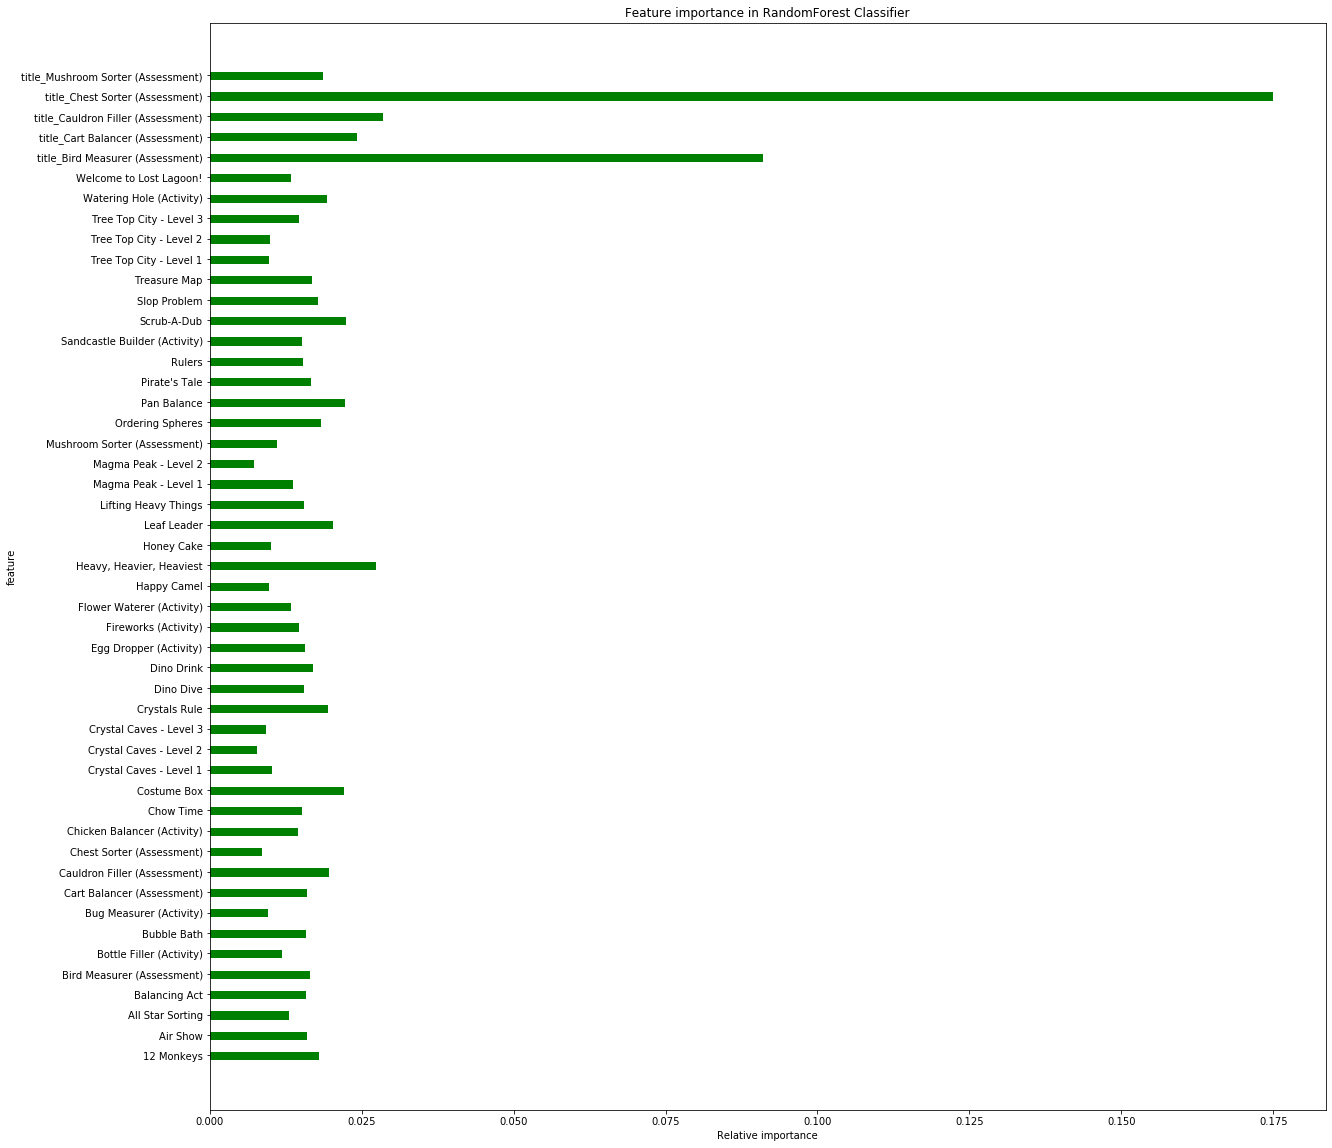

<Figure size 1440x1440 with 0 Axes>

In [732]:

import matplotlib.pyplot as plt
col = features_copy.columns
#modelname.feature_importance_
y = estimator.feature_importances_
#plot
fig, ax = plt.subplots() 
width = 0.4 # the width of the bars 
ind = np.arange(len(y)) # the x locations for the groups
ax.barh(ind, y, width, color='green')
ax.set_yticks(ind+width/10)
ax.set_yticklabels(col, minor=False)
plt.title('Feature importance in RandomForest Classifier')
plt.xlabel('Relative importance')
plt.ylabel('feature') 
plt.figure(figsize=(20,20))
fig.set_size_inches(20, 20, forward=True)

In [733]:
print(col)

Index(['12 Monkeys', 'Air Show', 'All Star Sorting', 'Balancing Act',
       'Bird Measurer (Assessment)', 'Bottle Filler (Activity)', 'Bubble Bath',
       'Bug Measurer (Activity)', 'Cart Balancer (Assessment)',
       'Cauldron Filler (Assessment)', 'Chest Sorter (Assessment)',
       'Chicken Balancer (Activity)', 'Chow Time', 'Costume Box',
       'Crystal Caves - Level 1', 'Crystal Caves - Level 2',
       'Crystal Caves - Level 3', 'Crystals Rule', 'Dino Dive', 'Dino Drink',
       'Egg Dropper (Activity)', 'Fireworks (Activity)',
       'Flower Waterer (Activity)', 'Happy Camel', 'Heavy, Heavier, Heaviest',
       'Honey Cake', 'Leaf Leader', 'Lifting Heavy Things',
       'Magma Peak - Level 1', 'Magma Peak - Level 2',
       'Mushroom Sorter (Assessment)', 'Ordering Spheres', 'Pan Balance',
       'Pirate's Tale', 'Rulers', 'Sandcastle Builder (Activity)',
       'Scrub-A-Dub', 'Slop Problem', 'Treasure Map',
       'Tree Top City - Level 1', 'Tree Top City - Level 2',
      

In [734]:
results=pd.DataFrame(y,col)
results

,0
12 Monkeys,0.017909
Air Show,0.015932
All Star Sorting,0.012974
Balancing Act,0.015923
Bird Measurer (Assessment),0.016473
Bottle Filler (Activity),0.011937
Bubble Bath,0.015897
Bug Measurer (Activity),0.009670
Cart Balancer (Assessment),0.016004
Cauldron Filler (Assessment),0.019560


In [735]:
categories_of_titles

,type,world
title,,
Welcome to Lost Lagoon!,Clip,NONE
Magma Peak - Level 1,Clip,MAGMAPEAK
Sandcastle Builder (Activity),Activity,MAGMAPEAK
Scrub-A-Dub,Game,MAGMAPEAK
Magma Peak - Level 2,Clip,MAGMAPEAK
Dino Drink,Game,MAGMAPEAK
Tree Top City - Level 1,Clip,TREETOPCITY
Ordering Spheres,Clip,TREETOPCITY
Watering Hole (Activity),Activity,MAGMAPEAK


In [736]:
results_total=results.join(categories_of_titles)
results_total

,0,type,world
12 Monkeys,0.017909,Clip,TREETOPCITY
Air Show,0.015932,Game,TREETOPCITY
All Star Sorting,0.012974,Game,TREETOPCITY
Balancing Act,0.015923,Clip,CRYSTALCAVES
Bird Measurer (Assessment),0.016473,Assessment,TREETOPCITY
Bottle Filler (Activity),0.011937,Activity,MAGMAPEAK
Bubble Bath,0.015897,Game,MAGMAPEAK
Bug Measurer (Activity),0.009670,Activity,TREETOPCITY
Cart Balancer (Assessment),0.016004,Assessment,CRYSTALCAVES
Cauldron Filler (Assessment),0.019560,Assessment,MAGMAPEAK


In [737]:
results_total[results_total['world']=='MAGMAPEAK']

,0,type,world
Bottle Filler (Activity),0.011937,Activity,MAGMAPEAK
Bubble Bath,0.015897,Game,MAGMAPEAK
Cauldron Filler (Assessment),0.019560,Assessment,MAGMAPEAK
Dino Dive,0.015444,Game,MAGMAPEAK
Dino Drink,0.017060,Game,MAGMAPEAK
Magma Peak - Level 1,0.013669,Clip,MAGMAPEAK
Magma Peak - Level 2,0.007245,Clip,MAGMAPEAK
Sandcastle Builder (Activity),0.015196,Activity,MAGMAPEAK
Scrub-A-Dub,0.022407,Game,MAGMAPEAK
Slop Problem,0.017799,Clip,MAGMAPEAK


In [738]:
def create_plot(world,color):
    fig, ax = plt.subplots() 
    width = 0.4 # the width of the bars 
    ind = np.arange(len(results_total[results_total['world']==world][0])) # the x locations for the groups
    ax.barh(ind, results_total[results_total['world']==world][0], width, color=color)
    ax.set_yticks(ind+width/10)
    ax.set_yticklabels(results_total[results_total['world']==world].index.tolist(), minor=False)
    plt.title('Feature importance in RandomForest Classifier')
    plt.xlabel('Relative importance')
    plt.ylabel('feature') 
    plt.xlim(0, 0.03)
    plt.figure(figsize=(10,10))
    fig.set_size_inches(10, 10, forward=True)


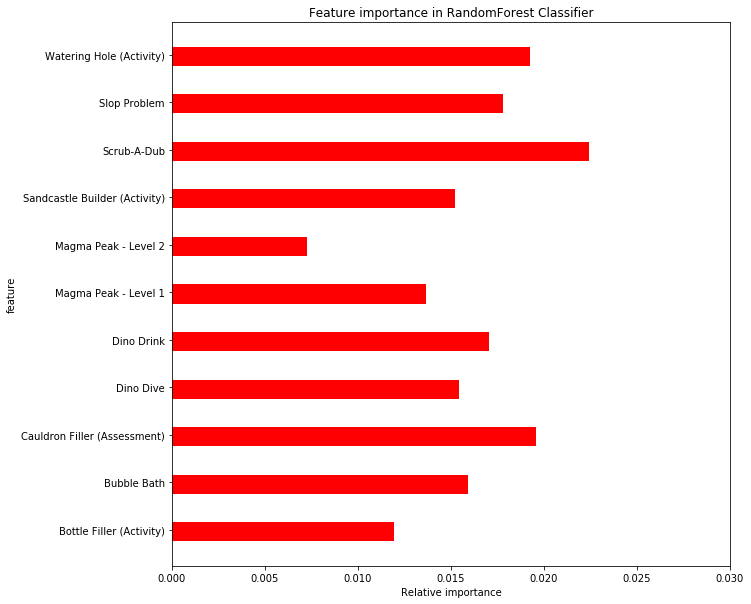

<Figure size 720x720 with 0 Axes>

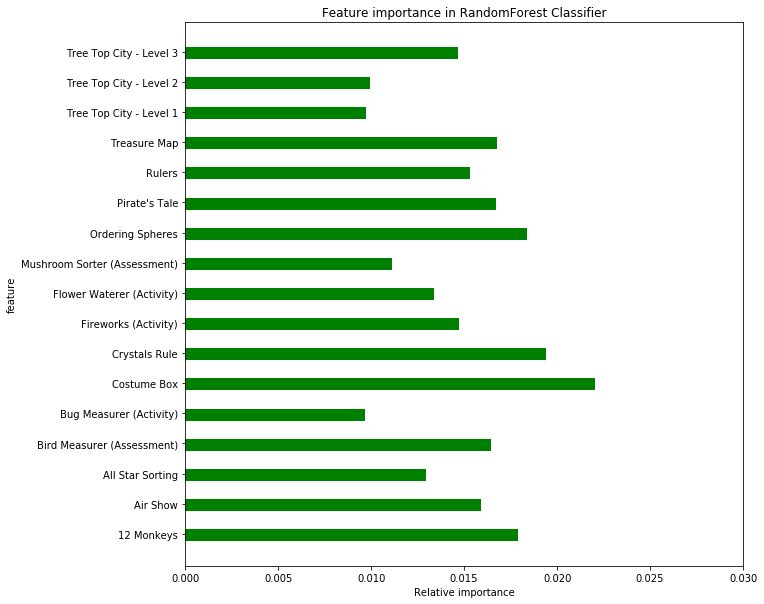

<Figure size 720x720 with 0 Axes>

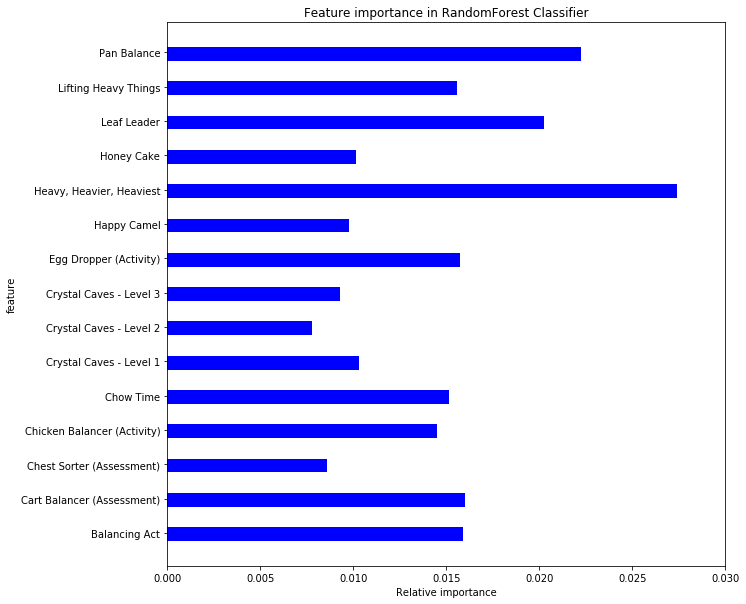

<Figure size 720x720 with 0 Axes>

In [739]:
create_plot('MAGMAPEAK','red')
create_plot('TREETOPCITY','green')
create_plot('CRYSTALCAVES','blue')

In [740]:
def create_plot_type(type_interaction,color):
    fig, ax = plt.subplots() 
    width = 0.4 # the width of the bars 
    ind = np.arange(len(results_total[results_total['type']==type_interaction][0])) # the x locations for the groups
    ax.barh(ind, results_total[results_total['type']==type_interaction][0], width, color=color)
    ax.set_yticks(ind+width/10)
    ax.set_yticklabels(results_total[results_total['type']==type_interaction].index.tolist(), minor=False)
    plt.title('Feature importance in RandomForest Classifier')
    plt.xlabel('Relative importance')
    plt.ylabel('feature') 
    plt.xlim(0, 0.03)
    plt.figure(figsize=(10,10))
    fig.set_size_inches(10, 10, forward=True)


In [741]:
results_total[results_total['type']=='Activity'].index.tolist()

['Bottle Filler (Activity)',
 'Bug Measurer (Activity)',
 'Chicken Balancer (Activity)',
 'Egg Dropper (Activity)',
 'Fireworks (Activity)',
 'Flower Waterer (Activity)',
 'Sandcastle Builder (Activity)',
 'Watering Hole (Activity)']

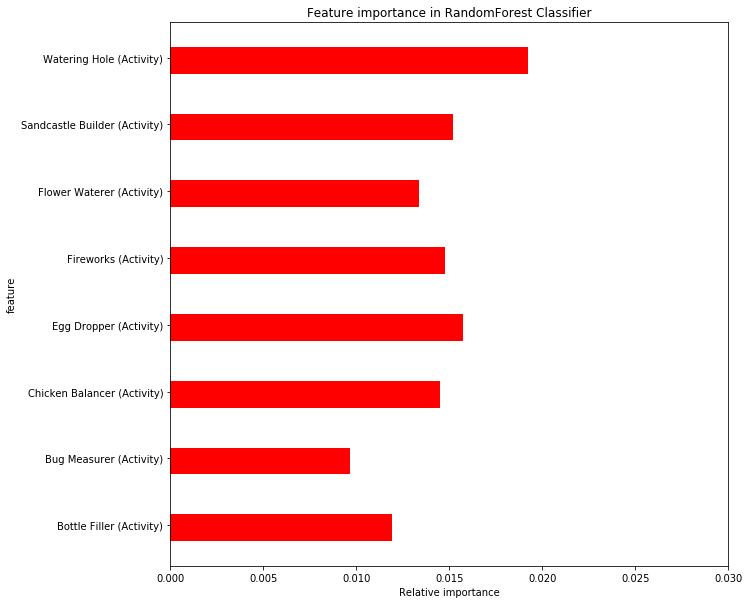

<Figure size 720x720 with 0 Axes>

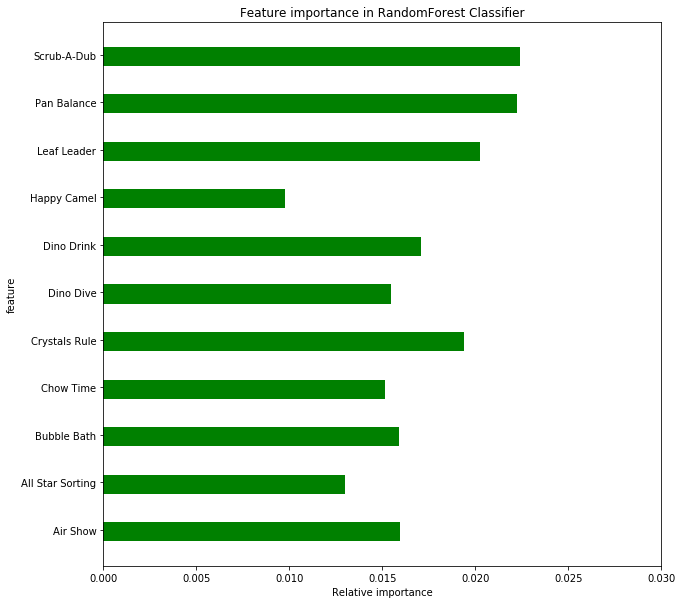

<Figure size 720x720 with 0 Axes>

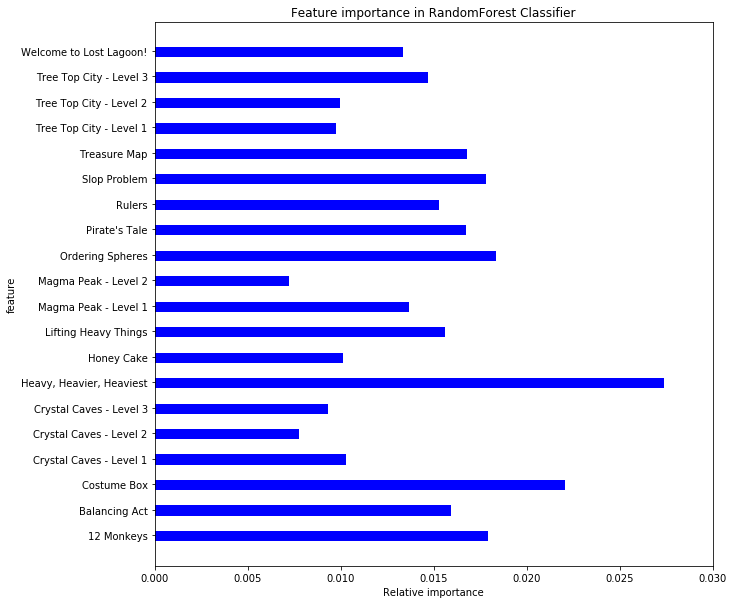

<Figure size 720x720 with 0 Axes>

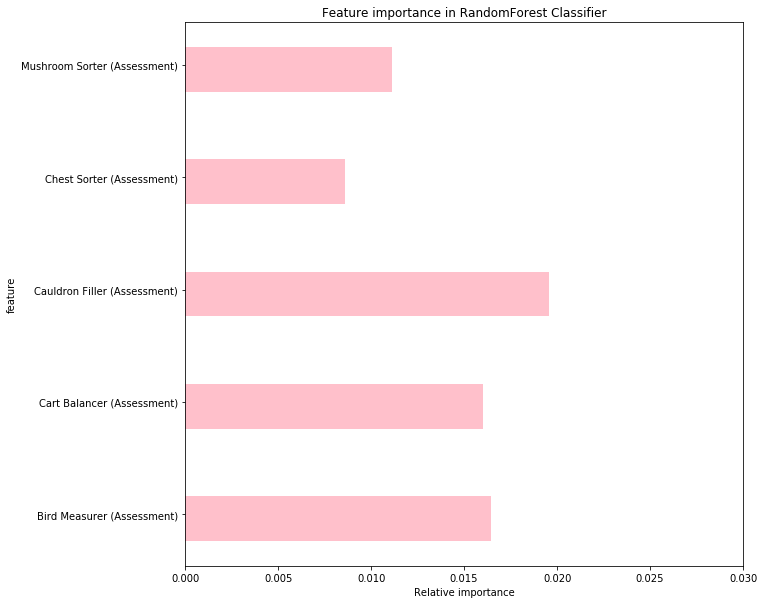

<Figure size 720x720 with 0 Axes>

In [742]:
create_plot_type('Activity','red')
create_plot_type('Game','green')
create_plot_type('Clip','blue')
create_plot_type('Assessment','pink')
